In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

import cv2, os

In [ ]:
# from PIL import Image
# # load the image
# image = Image.open('drive/My Drive/dataset_coffee/dataset_percobaan1/kelas_1/DSCF0903.JPG')
# # summarize some details about the image
# print(image.format)
# print(image.mode)
# print(image.size)
# # show the image
# image.show()

In [ ]:
header = ['no', 'id', 'iso', 'class','label']

from google.colab import files
uploaded = files.upload()

Saving dasetallclass.csv to dasetallclass.csv


In [ ]:
import io
dtLabel = pd.read_csv(io.BytesIO(uploaded['dasetallclass.csv']))

#dataset is now stored in a pandas dataframe
dtLabel

,no,id,iso,class,label
0,1,DSCF0903.JPG,400,specialty,0
1,2,DSCF0900.JPG,800,specialty,0
2,3,DSCF0904.JPG,1250,specialty,0
3,4,DSCF0905.JPG,400,specialty,0
4,5,DSCF0910.JPG,800,specialty,0
...,...,...,...,...,...
895,896,DSCF2197.JPG,800,off,4
896,897,DSCF2198.JPG,1250,off,4
897,898,DSCF2200.JPG,400,off,4
898,899,DSCF2201.JPG,800,off,4


In [ ]:
width = 265#1920#530#265
height = 265#149#1024#298#149

In [ ]:
listId = dtLabel['id'] #dari dataset

# train == dtLabel

### COBA UBAH KAYAK YANG BAWAH

import glob
image_list = []
arrayImages = []
for i in tqdm(range(dtLabel.shape[0])):
  img = image.load_img('drive/My Drive/dataset_coffee/dasetallclass/' + dtLabel['id'][i])
  print(img)
  img = img.resize((width, height))#.convert('L') #265:149
  #img = np.array(img)
  image_list.append(img)
  img = np.array(img)
  arrayImages.append(img)

label = dtLabel['label']

  0%|          | 0/900 [00:00<?, ?it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD558D0>


  0%|          | 1/900 [00:00<04:32,  3.30it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD61358>


  0%|          | 2/900 [00:00<04:25,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD61358>


  0%|          | 3/900 [00:00<04:22,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD552E8>


  0%|          | 4/900 [00:01<04:15,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD5C3C8>


  1%|          | 5/900 [00:01<04:14,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD57358>


  1%|          | 6/900 [00:01<04:12,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD70EF0>


  1%|          | 7/900 [00:01<04:07,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD70B38>


  1%|          | 8/900 [00:02<04:06,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF2780>


  1%|          | 9/900 [00:02<04:13,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD70EF0>


  1%|          | 10/900 [00:02<04:12,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD70B70>


  1%|          | 11/900 [00:03<04:12,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DB5DE588>


  1%|▏         | 12/900 [00:03<04:15,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF2C88>


  1%|▏         | 13/900 [00:03<04:11,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD677F0>


  2%|▏         | 14/900 [00:03<04:13,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF2DA0>


  2%|▏         | 15/900 [00:04<04:15,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF2DA0>


  2%|▏         | 16/900 [00:04<04:14,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF2DA0>


  2%|▏         | 17/900 [00:04<04:18,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4550>


  2%|▏         | 18/900 [00:05<04:17,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4A20>


  2%|▏         | 19/900 [00:05<04:15,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4B70>


  2%|▏         | 20/900 [00:05<04:12,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF44E0>


  2%|▏         | 21/900 [00:06<04:14,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4DD8>


  2%|▏         | 22/900 [00:06<04:11,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4CC0>


  3%|▎         | 23/900 [00:06<04:13,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF47B8>


  3%|▎         | 24/900 [00:06<04:12,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4160>


  3%|▎         | 25/900 [00:07<04:10,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4B70>


  3%|▎         | 26/900 [00:07<04:11,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4DD8>


  3%|▎         | 27/900 [00:07<04:12,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4EF0>


  3%|▎         | 28/900 [00:08<04:08,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4F60>


  3%|▎         | 29/900 [00:08<04:07,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5BA8>


  3%|▎         | 30/900 [00:08<04:13,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4160>


  3%|▎         | 31/900 [00:08<04:07,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF4FD0>


  4%|▎         | 32/900 [00:09<04:06,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF54E0>


  4%|▎         | 33/900 [00:09<04:09,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF47B8>


  4%|▍         | 34/900 [00:09<04:06,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF54E0>


  4%|▍         | 35/900 [00:10<04:04,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5080>


  4%|▍         | 36/900 [00:10<04:07,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5710>


  4%|▍         | 37/900 [00:10<04:06,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF54A8>


  4%|▍         | 38/900 [00:10<04:06,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF55C0>


  4%|▍         | 39/900 [00:11<04:08,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5CF8>


  4%|▍         | 40/900 [00:11<04:03,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5F60>


  5%|▍         | 41/900 [00:11<03:59,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5588>


  5%|▍         | 42/900 [00:11<04:00,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF59B0>


  5%|▍         | 43/900 [00:12<03:58,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5400>


  5%|▍         | 44/900 [00:12<04:01,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5D30>


  5%|▌         | 45/900 [00:12<04:04,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5978>


  5%|▌         | 46/900 [00:13<03:59,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5B38>


  5%|▌         | 47/900 [00:13<04:00,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5550>


  5%|▌         | 48/900 [00:13<04:08,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5978>


  5%|▌         | 49/900 [00:13<04:06,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF59E8>


  6%|▌         | 50/900 [00:14<04:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5320>


  6%|▌         | 51/900 [00:14<04:07,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5940>


  6%|▌         | 52/900 [00:14<04:05,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5C18>


  6%|▌         | 53/900 [00:15<04:12,  3.36it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5470>


  6%|▌         | 54/900 [00:15<04:10,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF59E8>


  6%|▌         | 55/900 [00:15<04:02,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5E80>


  6%|▌         | 56/900 [00:16<04:02,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5470>


  6%|▋         | 57/900 [00:16<04:02,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5D68>


  6%|▋         | 58/900 [00:16<04:00,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5780>


  7%|▋         | 59/900 [00:16<03:58,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5C88>


  7%|▋         | 60/900 [00:17<03:59,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5A20>


  7%|▋         | 61/900 [00:17<03:55,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5E80>


  7%|▋         | 62/900 [00:17<03:55,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5D68>


  7%|▋         | 63/900 [00:17<03:56,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5780>


  7%|▋         | 64/900 [00:18<03:54,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5E80>


  7%|▋         | 65/900 [00:18<03:55,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5160>


  7%|▋         | 66/900 [00:18<03:58,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF59E8>


  7%|▋         | 67/900 [00:19<03:56,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5160>


  8%|▊         | 68/900 [00:19<03:56,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF5E80>


  8%|▊         | 69/900 [00:19<04:00,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5160>


  8%|▊         | 70/900 [00:19<03:57,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5550>


  8%|▊         | 71/900 [00:20<03:56,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5A20>


  8%|▊         | 72/900 [00:20<03:57,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5898>


  8%|▊         | 73/900 [00:20<03:53,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5DA0>


  8%|▊         | 74/900 [00:21<03:50,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5F60>


  8%|▊         | 75/900 [00:21<03:50,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5B70>


  8%|▊         | 76/900 [00:21<03:48,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5DA0>


  9%|▊         | 77/900 [00:21<03:49,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5C50>


  9%|▊         | 78/900 [00:22<03:51,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA54A8>


  9%|▉         | 79/900 [00:22<03:49,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5CF8>


  9%|▉         | 80/900 [00:22<03:52,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5358>


  9%|▉         | 81/900 [00:23<03:54,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA52B0>


  9%|▉         | 82/900 [00:23<03:50,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5A90>


  9%|▉         | 83/900 [00:23<03:50,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA54E0>


  9%|▉         | 84/900 [00:23<03:52,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA56D8>


  9%|▉         | 85/900 [00:24<03:50,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5F60>


 10%|▉         | 86/900 [00:24<03:48,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5710>


 10%|▉         | 87/900 [00:24<03:53,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5668>


 10%|▉         | 88/900 [00:25<03:50,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5FD0>


 10%|▉         | 89/900 [00:25<03:52,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5F98>


 10%|█         | 90/900 [00:25<03:58,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA55F8>


 10%|█         | 91/900 [00:25<03:52,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5320>


 10%|█         | 92/900 [00:26<03:51,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5A58>


 10%|█         | 93/900 [00:26<03:52,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5828>


 10%|█         | 94/900 [00:26<03:50,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5320>


 11%|█         | 95/900 [00:27<03:49,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA55F8>


 11%|█         | 96/900 [00:27<03:48,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA50F0>


 11%|█         | 97/900 [00:27<03:45,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5A58>


 11%|█         | 98/900 [00:27<03:48,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5B00>


 11%|█         | 99/900 [00:28<03:49,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5F98>


 11%|█         | 100/900 [00:28<03:45,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5EF0>


 11%|█         | 101/900 [00:28<03:46,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA5A58>


 11%|█▏        | 102/900 [00:29<03:47,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA56A0>


 11%|█▏        | 103/900 [00:29<03:42,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA71D0>


 12%|█▏        | 104/900 [00:29<03:43,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7E10>


 12%|█▏        | 105/900 [00:29<03:45,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA75F8>


 12%|█▏        | 106/900 [00:30<03:42,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7048>


 12%|█▏        | 107/900 [00:30<03:42,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7A58>


 12%|█▏        | 108/900 [00:30<03:46,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA76D8>


 12%|█▏        | 109/900 [00:31<03:42,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7630>


 12%|█▏        | 110/900 [00:31<03:41,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7780>


 12%|█▏        | 111/900 [00:31<03:42,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7C50>


 12%|█▏        | 112/900 [00:31<03:41,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9556358>


 13%|█▎        | 113/900 [00:32<03:40,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA72E8>


 13%|█▎        | 114/900 [00:32<03:44,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7748>


 13%|█▎        | 115/900 [00:32<03:41,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7080>


 13%|█▎        | 116/900 [00:33<03:44,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7F98>


 13%|█▎        | 117/900 [00:33<03:44,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95569B0>


 13%|█▎        | 118/900 [00:33<03:40,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7080>


 13%|█▎        | 119/900 [00:33<03:41,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA79E8>


 13%|█▎        | 120/900 [00:34<03:42,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA76A0>


 13%|█▎        | 121/900 [00:34<03:38,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95561D0>


 14%|█▎        | 122/900 [00:34<03:37,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9556400>


 14%|█▎        | 123/900 [00:35<03:43,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9556240>


 14%|█▍        | 124/900 [00:35<03:40,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9556CF8>


 14%|█▍        | 125/900 [00:35<03:37,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9556710>


 14%|█▍        | 126/900 [00:35<03:47,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95566A0>


 14%|█▍        | 127/900 [00:36<03:41,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95561D0>


 14%|█▍        | 128/900 [00:36<03:40,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95564E0>


 14%|█▍        | 129/900 [00:36<03:44,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95564E0>


 14%|█▍        | 130/900 [00:37<03:41,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9556CF8>


 15%|█▍        | 131/900 [00:37<03:40,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA77F0>


 15%|█▍        | 132/900 [00:37<03:40,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7F60>


 15%|█▍        | 133/900 [00:37<03:37,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7DD8>


 15%|█▍        | 134/900 [00:38<03:38,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA75C0>


 15%|█▌        | 135/900 [00:38<03:39,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7F98>


 15%|█▌        | 136/900 [00:38<03:39,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7E80>


 15%|█▌        | 137/900 [00:39<03:38,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7550>


 15%|█▌        | 138/900 [00:39<03:38,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7C88>


 15%|█▌        | 139/900 [00:39<03:35,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA70F0>


 16%|█▌        | 140/900 [00:39<03:34,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7240>


 16%|█▌        | 141/900 [00:40<03:37,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7080>


 16%|█▌        | 142/900 [00:40<03:35,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954FA20>


 16%|█▌        | 143/900 [00:40<03:33,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA70F0>


 16%|█▌        | 144/900 [00:41<03:37,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F860>


 16%|█▌        | 145/900 [00:41<03:33,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7828>


 16%|█▌        | 146/900 [00:41<03:31,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA76D8>


 16%|█▋        | 147/900 [00:41<03:32,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7710>


 16%|█▋        | 148/900 [00:42<03:32,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7828>


 17%|█▋        | 149/900 [00:42<03:31,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7438>


 17%|█▋        | 150/900 [00:42<03:34,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACA7940>


 17%|█▋        | 151/900 [00:42<03:31,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F048>


 17%|█▋        | 152/900 [00:43<03:31,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F3C8>


 17%|█▋        | 153/900 [00:43<03:31,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F8D0>


 17%|█▋        | 154/900 [00:43<03:29,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F710>


 17%|█▋        | 155/900 [00:44<03:31,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954FC18>


 17%|█▋        | 156/900 [00:44<03:32,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F860>


 17%|█▋        | 157/900 [00:44<03:30,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F198>


 18%|█▊        | 158/900 [00:44<03:28,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F6D8>


 18%|█▊        | 159/900 [00:45<03:30,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547CF8>


 18%|█▊        | 160/900 [00:45<03:26,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F080>


 18%|█▊        | 161/900 [00:45<03:25,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F6D8>


 18%|█▊        | 162/900 [00:46<03:28,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9523A20>


 18%|█▊        | 163/900 [00:46<03:30,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F6D8>


 18%|█▊        | 164/900 [00:46<03:27,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95471D0>


 18%|█▊        | 165/900 [00:46<03:27,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954FB00>


 18%|█▊        | 166/900 [00:47<03:25,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547F60>


 19%|█▊        | 167/900 [00:47<03:24,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9568550>


 19%|█▊        | 168/900 [00:47<03:25,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F9E8>


 19%|█▉        | 169/900 [00:48<03:22,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F5C0>


 19%|█▉        | 170/900 [00:48<03:23,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95FCE48>


 19%|█▉        | 171/900 [00:48<03:25,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547080>


 19%|█▉        | 172/900 [00:48<03:23,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547CC0>


 19%|█▉        | 173/900 [00:49<03:23,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547400>


 19%|█▉        | 174/900 [00:49<03:24,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547198>


 19%|█▉        | 175/900 [00:49<03:21,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954FE48>


 20%|█▉        | 176/900 [00:50<03:19,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547E80>


 20%|█▉        | 177/900 [00:50<03:23,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547DA0>


 20%|█▉        | 178/900 [00:50<03:20,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547CC0>


 20%|█▉        | 179/900 [00:50<03:21,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954FDD8>


 20%|██        | 180/900 [00:51<03:23,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954FD30>


 20%|██        | 181/900 [00:51<03:21,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F8D0>


 20%|██        | 182/900 [00:51<03:19,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547E48>


 20%|██        | 183/900 [00:51<03:20,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547EB8>


 20%|██        | 184/900 [00:52<03:18,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547DD8>


 21%|██        | 185/900 [00:52<03:17,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547FD0>


 21%|██        | 186/900 [00:52<03:18,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9535208>


 21%|██        | 187/900 [00:53<03:18,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547A90>


 21%|██        | 188/900 [00:53<03:18,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95352E8>


 21%|██        | 189/900 [00:53<03:19,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547A90>


 21%|██        | 190/900 [00:53<03:16,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547D68>


 21%|██        | 191/900 [00:54<03:15,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547D68>


 21%|██▏       | 192/900 [00:54<03:18,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9542EB8>


 21%|██▏       | 193/900 [00:54<03:17,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95354E0>


 22%|██▏       | 194/900 [00:55<03:15,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9542860>


 22%|██▏       | 195/900 [00:55<03:17,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9535CF8>


 22%|██▏       | 196/900 [00:55<03:13,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9547CC0>


 22%|██▏       | 197/900 [00:55<03:12,  3.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9542F98>


 22%|██▏       | 198/900 [00:56<03:13,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9542EB8>


 22%|██▏       | 199/900 [00:56<03:13,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9542EB8>


 22%|██▏       | 200/900 [00:56<03:16,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9542EB8>


 22%|██▏       | 201/900 [00:56<03:18,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9542860>


 22%|██▏       | 202/900 [00:57<03:14,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95354E0>


 23%|██▎       | 203/900 [00:57<03:14,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9535160>


 23%|██▎       | 204/900 [00:57<03:14,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F7B8>


 23%|██▎       | 205/900 [00:58<03:11,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9535908>


 23%|██▎       | 206/900 [00:58<03:11,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9535470>


 23%|██▎       | 207/900 [00:58<03:12,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D95352E8>


 23%|██▎       | 208/900 [00:58<03:10,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F898>


 23%|██▎       | 209/900 [00:59<03:09,  3.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9535BA8>


 23%|██▎       | 210/900 [00:59<03:12,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9535940>


 23%|██▎       | 211/900 [00:59<03:10,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9535208>


 24%|██▎       | 212/900 [01:00<03:07,  3.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9535CF8>


 24%|██▎       | 213/900 [01:00<03:08,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9535C18>


 24%|██▍       | 214/900 [01:00<03:11,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9535C18>


 24%|██▍       | 215/900 [01:00<03:12,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F860>


 24%|██▍       | 216/900 [01:01<03:13,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954FE10>


 24%|██▍       | 217/900 [01:01<03:12,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F2B0>


 24%|██▍       | 218/900 [01:01<03:11,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F978>


 24%|██▍       | 219/900 [01:01<03:13,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F1D0>


 24%|██▍       | 220/900 [01:02<03:11,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F518>


 25%|██▍       | 221/900 [01:02<03:11,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954FD68>


 25%|██▍       | 222/900 [01:02<03:14,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F2B0>


 25%|██▍       | 223/900 [01:03<03:11,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F978>


 25%|██▍       | 224/900 [01:03<03:09,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954FD68>


 25%|██▌       | 225/900 [01:03<03:13,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F080>


 25%|██▌       | 226/900 [01:03<03:10,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954FF60>


 25%|██▌       | 227/900 [01:04<03:09,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954FD68>


 25%|██▌       | 228/900 [01:04<03:12,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D954F240>


 25%|██▌       | 229/900 [01:04<03:09,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6AC8>


 26%|██▌       | 230/900 [01:05<03:08,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6080>


 26%|██▌       | 231/900 [01:05<03:10,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E66A0>


 26%|██▌       | 232/900 [01:05<03:08,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6F28>


 26%|██▌       | 233/900 [01:05<03:08,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E69E8>


 26%|██▌       | 234/900 [01:06<03:10,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E63C8>


 26%|██▌       | 235/900 [01:06<03:08,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6668>


 26%|██▌       | 236/900 [01:06<03:09,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6630>


 26%|██▋       | 237/900 [01:07<03:10,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6160>


 26%|██▋       | 238/900 [01:07<03:12,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6278>


 27%|██▋       | 239/900 [01:07<03:11,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6C50>


 27%|██▋       | 240/900 [01:07<03:13,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6860>


 27%|██▋       | 241/900 [01:08<03:10,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6F60>


 27%|██▋       | 242/900 [01:08<03:10,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6908>


 27%|██▋       | 243/900 [01:08<03:14,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E67F0>


 27%|██▋       | 244/900 [01:09<03:10,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6828>


 27%|██▋       | 245/900 [01:09<03:09,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6860>


 27%|██▋       | 246/900 [01:09<03:13,  3.38it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6D68>


 27%|██▋       | 247/900 [01:10<03:09,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6DD8>


 28%|██▊       | 248/900 [01:10<03:07,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6A90>


 28%|██▊       | 249/900 [01:10<03:07,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E62E8>


 28%|██▊       | 250/900 [01:10<03:06,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6860>


 28%|██▊       | 251/900 [01:11<03:04,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6710>


 28%|██▊       | 252/900 [01:11<03:09,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6EF0>


 28%|██▊       | 253/900 [01:11<03:07,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6E10>


 28%|██▊       | 254/900 [01:12<03:05,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6DA0>


 28%|██▊       | 255/900 [01:12<03:06,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6B70>


 28%|██▊       | 256/900 [01:12<03:05,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6390>


 29%|██▊       | 257/900 [01:12<03:05,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E60B8>


 29%|██▊       | 258/900 [01:13<03:08,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E65F8>


 29%|██▉       | 259/900 [01:13<03:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6E10>


 29%|██▉       | 260/900 [01:13<03:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6B70>


 29%|██▉       | 261/900 [01:14<03:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6BA8>


 29%|██▉       | 262/900 [01:14<03:01,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6DA0>


 29%|██▉       | 263/900 [01:14<02:59,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6B70>


 29%|██▉       | 264/900 [01:14<03:03,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94E6320>


 29%|██▉       | 265/900 [01:15<03:01,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D860>


 30%|██▉       | 266/900 [01:15<02:59,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D550>


 30%|██▉       | 267/900 [01:15<03:01,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D128>


 30%|██▉       | 268/900 [01:16<02:59,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DDD8>


 30%|██▉       | 269/900 [01:16<02:57,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DBE0>


 30%|███       | 270/900 [01:16<03:01,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D358>


 30%|███       | 271/900 [01:16<02:59,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D048>


 30%|███       | 272/900 [01:17<02:58,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DE80>


 30%|███       | 273/900 [01:17<02:59,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D518>


 30%|███       | 274/900 [01:17<03:02,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DA20>


 31%|███       | 275/900 [01:18<02:59,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DEB8>


 31%|███       | 276/900 [01:18<03:00,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D710>


 31%|███       | 277/900 [01:18<02:57,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D400>


 31%|███       | 278/900 [01:18<02:57,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D198>


 31%|███       | 279/900 [01:19<02:57,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D710>


 31%|███       | 280/900 [01:19<02:56,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D748>


 31%|███       | 281/900 [01:19<02:57,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D630>


 31%|███▏      | 282/900 [01:20<02:57,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DDA0>


 31%|███▏      | 283/900 [01:20<02:54,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DA90>


 32%|███▏      | 284/900 [01:20<02:53,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D668>


 32%|███▏      | 285/900 [01:20<02:57,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DCF8>


 32%|███▏      | 286/900 [01:21<02:54,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D898>


 32%|███▏      | 287/900 [01:21<02:54,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DE48>


 32%|███▏      | 288/900 [01:21<02:57,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D0B8>


 32%|███▏      | 289/900 [01:22<02:56,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DB38>


 32%|███▏      | 290/900 [01:22<02:54,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DF28>


 32%|███▏      | 291/900 [01:22<02:54,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DB00>


 32%|███▏      | 292/900 [01:22<02:52,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D6D8>


 33%|███▎      | 293/900 [01:23<02:50,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D4E0>


 33%|███▎      | 294/900 [01:23<02:52,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DB38>


 33%|███▎      | 295/900 [01:23<02:50,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DF28>


 33%|███▎      | 296/900 [01:24<02:52,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DB00>


 33%|███▎      | 297/900 [01:24<02:52,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948D588>


 33%|███▎      | 298/900 [01:24<02:50,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DBA8>


 33%|███▎      | 299/900 [01:24<02:51,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DB00>


 33%|███▎      | 300/900 [01:25<02:51,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DB00>


 33%|███▎      | 301/900 [01:25<02:49,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948DC18>


 34%|███▎      | 302/900 [01:25<02:49,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B208>


 34%|███▎      | 303/900 [01:26<02:52,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BAC8>


 34%|███▍      | 304/900 [01:26<02:48,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B748>


 34%|███▍      | 305/900 [01:26<02:47,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B6A0>


 34%|███▍      | 306/900 [01:26<02:52,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B2E8>


 34%|███▍      | 307/900 [01:27<02:50,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BA90>


 34%|███▍      | 308/900 [01:27<02:48,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B7F0>


 34%|███▍      | 309/900 [01:27<02:49,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B1D0>


 34%|███▍      | 310/900 [01:28<02:50,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BD30>


 35%|███▍      | 311/900 [01:28<02:52,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B7F0>


 35%|███▍      | 312/900 [01:28<02:50,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BFD0>


 35%|███▍      | 313/900 [01:28<02:49,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B550>


 35%|███▍      | 314/900 [01:29<02:48,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B160>


 35%|███▌      | 315/900 [01:29<02:48,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BD30>


 35%|███▌      | 316/900 [01:29<02:45,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BDD8>


 35%|███▌      | 317/900 [01:30<02:46,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BB00>


 35%|███▌      | 318/900 [01:30<02:46,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BEB8>


 35%|███▌      | 319/900 [01:30<02:43,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BBA8>


 36%|███▌      | 320/900 [01:30<02:43,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B320>


 36%|███▌      | 321/900 [01:31<02:45,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BC88>


 36%|███▌      | 322/900 [01:31<02:43,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B128>


 36%|███▌      | 323/900 [01:31<02:44,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B630>


 36%|███▌      | 324/900 [01:32<02:47,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B908>


 36%|███▌      | 325/900 [01:32<02:44,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B9B0>


 36%|███▌      | 326/900 [01:32<02:43,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B710>


 36%|███▋      | 327/900 [01:32<02:43,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B400>


 36%|███▋      | 328/900 [01:33<02:42,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B5C0>


 37%|███▋      | 329/900 [01:33<02:43,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BDA0>


 37%|███▋      | 330/900 [01:33<02:44,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948BE48>


 37%|███▋      | 331/900 [01:34<02:45,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B9B0>


 37%|███▋      | 332/900 [01:34<02:43,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B400>


 37%|███▋      | 333/900 [01:34<02:43,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B908>


 37%|███▋      | 334/900 [01:34<02:42,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B9B0>


 37%|███▋      | 335/900 [01:35<02:42,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B400>


 37%|███▋      | 336/900 [01:35<02:42,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948B400>


 37%|███▋      | 337/900 [01:35<02:42,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E278>


 38%|███▊      | 338/900 [01:36<02:45,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948EA58>


 38%|███▊      | 339/900 [01:36<02:44,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E2B0>


 38%|███▊      | 340/900 [01:36<02:40,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E2E8>


 38%|███▊      | 341/900 [01:36<02:41,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E6D8>


 38%|███▊      | 342/900 [01:37<02:43,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948EE80>


 38%|███▊      | 343/900 [01:37<02:41,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E940>


 38%|███▊      | 344/900 [01:37<02:40,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E780>


 38%|███▊      | 345/900 [01:38<02:43,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948EE48>


 38%|███▊      | 346/900 [01:38<02:39,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948ED68>


 39%|███▊      | 347/900 [01:38<02:40,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E518>


 39%|███▊      | 348/900 [01:39<02:39,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E550>


 39%|███▉      | 349/900 [01:39<02:42,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948EA90>


 39%|███▉      | 350/900 [01:39<02:39,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E208>


 39%|███▉      | 351/900 [01:39<02:38,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E588>


 39%|███▉      | 352/900 [01:40<02:37,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E6A0>


 39%|███▉      | 353/900 [01:40<02:36,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E9E8>


 39%|███▉      | 354/900 [01:40<02:37,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E978>


 39%|███▉      | 355/900 [01:41<02:35,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E208>


 40%|███▉      | 356/900 [01:41<02:36,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E4A8>


 40%|███▉      | 357/900 [01:41<02:37,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E630>


 40%|███▉      | 358/900 [01:41<02:34,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E860>


 40%|███▉      | 359/900 [01:42<02:32,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E4A8>


 40%|████      | 360/900 [01:42<02:37,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948EB70>


 40%|████      | 361/900 [01:42<02:34,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E7B8>


 40%|████      | 362/900 [01:43<02:34,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948EB00>


 40%|████      | 363/900 [01:43<02:36,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E048>


 40%|████      | 364/900 [01:43<02:34,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948EA20>


 41%|████      | 365/900 [01:43<02:33,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948EBA8>


 41%|████      | 366/900 [01:44<02:35,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E7B8>


 41%|████      | 367/900 [01:44<02:34,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948EB00>


 41%|████      | 368/900 [01:44<02:33,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E470>


 41%|████      | 369/900 [01:45<02:34,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948EB70>


 41%|████      | 370/900 [01:45<02:33,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E748>


 41%|████      | 371/900 [01:45<02:31,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948E748>


 41%|████▏     | 372/900 [01:45<02:32,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D948EA20>


 41%|████▏     | 373/900 [01:46<02:30,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492C50>


 42%|████▏     | 374/900 [01:46<02:31,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492320>


 42%|████▏     | 375/900 [01:46<02:32,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492D68>


 42%|████▏     | 376/900 [01:47<02:29,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492240>


 42%|████▏     | 377/900 [01:47<02:28,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492048>


 42%|████▏     | 378/900 [01:47<02:30,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492D68>


 42%|████▏     | 379/900 [01:47<02:28,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492E48>


 42%|████▏     | 380/900 [01:48<02:27,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492C18>


 42%|████▏     | 381/900 [01:48<02:29,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492E48>


 42%|████▏     | 382/900 [01:48<02:27,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492EB8>


 43%|████▎     | 383/900 [01:49<02:29,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492B70>


 43%|████▎     | 384/900 [01:49<02:30,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94923C8>


 43%|████▎     | 385/900 [01:49<02:28,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94928D0>


 43%|████▎     | 386/900 [01:49<02:27,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492588>


 43%|████▎     | 387/900 [01:50<02:26,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492898>


 43%|████▎     | 388/900 [01:50<02:25,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492B70>


 43%|████▎     | 389/900 [01:50<02:24,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492B00>


 43%|████▎     | 390/900 [01:51<02:25,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492278>


 43%|████▎     | 391/900 [01:51<02:22,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492908>


 44%|████▎     | 392/900 [01:51<02:22,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492710>


 44%|████▎     | 393/900 [01:51<02:24,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94927F0>


 44%|████▍     | 394/900 [01:52<02:22,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492208>


 44%|████▍     | 395/900 [01:52<02:24,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492240>


 44%|████▍     | 396/900 [01:52<02:26,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492F28>


 44%|████▍     | 397/900 [01:53<02:23,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94922B0>


 44%|████▍     | 398/900 [01:53<02:22,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492780>


 44%|████▍     | 399/900 [01:53<02:24,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492940>


 44%|████▍     | 400/900 [01:53<02:22,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492860>


 45%|████▍     | 401/900 [01:54<02:21,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492DA0>


 45%|████▍     | 402/900 [01:54<02:22,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94922B0>


 45%|████▍     | 403/900 [01:54<02:20,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492780>


 45%|████▍     | 404/900 [01:55<02:19,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492940>


 45%|████▌     | 405/900 [01:55<02:20,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492860>


 45%|████▌     | 406/900 [01:55<02:19,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492860>


 45%|████▌     | 407/900 [01:55<02:18,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492F28>


 45%|████▌     | 408/900 [01:56<02:19,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9492940>


 45%|████▌     | 409/900 [01:56<02:17,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497D30>


 46%|████▌     | 410/900 [01:56<02:17,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497BE0>


 46%|████▌     | 411/900 [01:57<02:20,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94976D8>


 46%|████▌     | 412/900 [01:57<02:18,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497D30>


 46%|████▌     | 413/900 [01:57<02:19,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497128>


 46%|████▌     | 414/900 [01:57<02:20,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497CF8>


 46%|████▌     | 415/900 [01:58<02:20,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497908>


 46%|████▌     | 416/900 [01:58<02:18,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497668>


 46%|████▋     | 417/900 [01:58<02:21,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497D30>


 46%|████▋     | 418/900 [01:59<02:19,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497F28>


 47%|████▋     | 419/900 [01:59<02:21,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497400>


 47%|████▋     | 420/900 [01:59<02:21,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94977F0>


 47%|████▋     | 421/900 [01:59<02:19,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497940>


 47%|████▋     | 422/900 [02:00<02:18,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497358>


 47%|████▋     | 423/900 [02:00<02:20,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497E48>


 47%|████▋     | 424/900 [02:00<02:17,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94979E8>


 47%|████▋     | 425/900 [02:01<02:15,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497080>


 47%|████▋     | 426/900 [02:01<02:16,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94979B0>


 47%|████▋     | 427/900 [02:01<02:17,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497198>


 48%|████▊     | 428/900 [02:01<02:16,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497320>


 48%|████▊     | 429/900 [02:02<02:17,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497780>


 48%|████▊     | 430/900 [02:02<02:15,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497860>


 48%|████▊     | 431/900 [02:02<02:14,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497DA0>


 48%|████▊     | 432/900 [02:03<02:14,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497EF0>


 48%|████▊     | 433/900 [02:03<02:12,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94973C8>


 48%|████▊     | 434/900 [02:03<02:14,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497550>


 48%|████▊     | 435/900 [02:03<02:15,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497588>


 48%|████▊     | 436/900 [02:04<02:13,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497278>


 49%|████▊     | 437/900 [02:04<02:13,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497E10>


 49%|████▊     | 438/900 [02:04<02:15,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94973C8>


 49%|████▉     | 439/900 [02:05<02:12,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497550>


 49%|████▉     | 440/900 [02:05<02:12,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497588>


 49%|████▉     | 441/900 [02:05<02:14,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94973C8>


 49%|████▉     | 442/900 [02:06<02:12,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497A90>


 49%|████▉     | 443/900 [02:06<02:12,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497AC8>


 49%|████▉     | 444/900 [02:06<02:12,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D9497AC8>


 49%|████▉     | 445/900 [02:06<02:13,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F908>


 50%|████▉     | 446/900 [02:07<02:12,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FDA0>


 50%|████▉     | 447/900 [02:07<02:12,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F668>


 50%|████▉     | 448/900 [02:07<02:11,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F400>


 50%|████▉     | 449/900 [02:08<02:10,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F7F0>


 50%|█████     | 450/900 [02:08<02:10,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F668>


 50%|█████     | 451/900 [02:08<02:08,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FE80>


 50%|█████     | 452/900 [02:08<02:09,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FC50>


 50%|█████     | 453/900 [02:09<02:09,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F9B0>


 50%|█████     | 454/900 [02:09<02:07,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F5F8>


 51%|█████     | 455/900 [02:09<02:10,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FAC8>


 51%|█████     | 456/900 [02:10<02:10,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F630>


 51%|█████     | 457/900 [02:10<02:08,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FC50>


 51%|█████     | 458/900 [02:10<02:09,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F9B0>


 51%|█████     | 459/900 [02:10<02:09,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F780>


 51%|█████     | 460/900 [02:11<02:07,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FF28>


 51%|█████     | 461/900 [02:11<02:06,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FBA8>


 51%|█████▏    | 462/900 [02:11<02:06,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F160>


 51%|█████▏    | 463/900 [02:12<02:05,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F4A8>


 52%|█████▏    | 464/900 [02:12<02:04,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FCF8>


 52%|█████▏    | 465/900 [02:12<02:06,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FF28>


 52%|█████▏    | 466/900 [02:12<02:05,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F6D8>


 52%|█████▏    | 467/900 [02:13<02:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F518>


 52%|█████▏    | 468/900 [02:13<02:05,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F4A8>


 52%|█████▏    | 469/900 [02:13<02:05,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FB00>


 52%|█████▏    | 470/900 [02:14<02:03,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F390>


 52%|█████▏    | 471/900 [02:14<02:04,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F4E0>


 52%|█████▏    | 472/900 [02:14<02:03,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F550>


 53%|█████▎    | 473/900 [02:14<02:02,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F978>


 53%|█████▎    | 474/900 [02:15<02:04,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FB00>


 53%|█████▎    | 475/900 [02:15<02:01,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F358>


 53%|█████▎    | 476/900 [02:15<02:02,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F4E0>


 53%|█████▎    | 477/900 [02:16<02:02,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F5C0>


 53%|█████▎    | 478/900 [02:16<02:00,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F0B8>


 53%|█████▎    | 479/900 [02:16<02:01,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949F0B8>


 53%|█████▎    | 480/900 [02:17<02:03,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D949FD68>


 53%|█████▎    | 481/900 [02:17<02:00,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2D30>


 54%|█████▎    | 482/900 [02:17<01:59,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2978>


 54%|█████▎    | 483/900 [02:17<02:01,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2DA0>


 54%|█████▍    | 484/900 [02:18<01:59,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A26A0>


 54%|█████▍    | 485/900 [02:18<02:00,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2978>


 54%|█████▍    | 486/900 [02:18<02:01,  3.40it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A24A8>


 54%|█████▍    | 487/900 [02:19<01:59,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2EF0>


 54%|█████▍    | 488/900 [02:19<01:58,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2198>


 54%|█████▍    | 489/900 [02:19<01:59,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2A20>


 54%|█████▍    | 490/900 [02:19<01:57,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2C18>


 55%|█████▍    | 491/900 [02:20<01:59,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A24A8>


 55%|█████▍    | 492/900 [02:20<01:59,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A29E8>


 55%|█████▍    | 493/900 [02:20<01:56,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2C88>


 55%|█████▍    | 494/900 [02:21<01:56,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2240>


 55%|█████▌    | 495/900 [02:21<01:55,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2710>


 55%|█████▌    | 496/900 [02:21<01:53,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2898>


 55%|█████▌    | 497/900 [02:21<01:53,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2B70>


 55%|█████▌    | 498/900 [02:22<01:55,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2208>


 55%|█████▌    | 499/900 [02:22<01:54,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2908>


 56%|█████▌    | 500/900 [02:22<01:53,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2B00>


 56%|█████▌    | 501/900 [02:23<01:54,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2518>


 56%|█████▌    | 502/900 [02:23<01:52,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2668>


 56%|█████▌    | 503/900 [02:23<01:52,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2FD0>


 56%|█████▌    | 504/900 [02:23<01:54,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A22E8>


 56%|█████▌    | 505/900 [02:24<01:52,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2080>


 56%|█████▌    | 506/900 [02:24<01:51,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2E80>


 56%|█████▋    | 507/900 [02:24<01:52,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2CC0>


 56%|█████▋    | 508/900 [02:25<01:51,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A27F0>


 57%|█████▋    | 509/900 [02:25<01:50,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2A90>


 57%|█████▋    | 510/900 [02:25<01:50,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2080>


 57%|█████▋    | 511/900 [02:25<01:48,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2E80>


 57%|█████▋    | 512/900 [02:26<01:48,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2160>


 57%|█████▋    | 513/900 [02:26<01:48,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A22E8>


 57%|█████▋    | 514/900 [02:26<01:46,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2A90>


 57%|█████▋    | 515/900 [02:26<01:47,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6D94A2A90>


 57%|█████▋    | 516/900 [02:27<01:48,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8CC0>


 57%|█████▋    | 517/900 [02:27<01:47,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8160>


 58%|█████▊    | 518/900 [02:27<01:46,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8208>


 58%|█████▊    | 519/900 [02:28<01:48,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF86A0>


 58%|█████▊    | 520/900 [02:28<01:46,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8630>


 58%|█████▊    | 521/900 [02:28<01:46,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8A20>


 58%|█████▊    | 522/900 [02:28<01:48,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8400>


 58%|█████▊    | 523/900 [02:29<01:47,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8BA8>


 58%|█████▊    | 524/900 [02:29<01:46,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8A20>


 58%|█████▊    | 525/900 [02:29<01:46,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8518>


 58%|█████▊    | 526/900 [02:30<01:46,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8588>


 59%|█████▊    | 527/900 [02:30<01:45,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8A20>


 59%|█████▊    | 528/900 [02:30<01:48,  3.42it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8240>


 59%|█████▉    | 529/900 [02:30<01:45,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8390>


 59%|█████▉    | 530/900 [02:31<01:45,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8128>


 59%|█████▉    | 531/900 [02:31<01:45,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8898>


 59%|█████▉    | 532/900 [02:31<01:45,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF89E8>


 59%|█████▉    | 533/900 [02:32<01:45,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8F28>


 59%|█████▉    | 534/900 [02:32<01:45,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8A58>


 59%|█████▉    | 535/900 [02:32<01:43,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF85F8>


 60%|█████▉    | 536/900 [02:32<01:43,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8EB8>


 60%|█████▉    | 537/900 [02:33<01:44,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8A58>


 60%|█████▉    | 538/900 [02:33<01:42,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8F60>


 60%|█████▉    | 539/900 [02:33<01:41,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8F98>


 60%|██████    | 540/900 [02:34<01:43,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF84A8>


 60%|██████    | 541/900 [02:34<01:41,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8278>


 60%|██████    | 542/900 [02:34<01:41,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8E10>


 60%|██████    | 543/900 [02:34<01:42,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF81D0>


 60%|██████    | 544/900 [02:35<01:41,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8D30>


 61%|██████    | 545/900 [02:35<01:40,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8B00>


 61%|██████    | 546/900 [02:35<01:40,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8D68>


 61%|██████    | 547/900 [02:36<01:40,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8278>


 61%|██████    | 548/900 [02:36<01:39,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF81D0>


 61%|██████    | 549/900 [02:36<01:40,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF8AC8>


 61%|██████    | 550/900 [02:36<01:40,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF80B8>


 61%|██████    | 551/900 [02:37<01:40,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF81D0>


 61%|██████▏   | 552/900 [02:37<01:40,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACF81D0>


 61%|██████▏   | 553/900 [02:37<01:38,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09860>


 62%|██████▏   | 554/900 [02:38<01:39,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09CC0>


 62%|██████▏   | 555/900 [02:38<01:38,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD095C0>


 62%|██████▏   | 556/900 [02:38<01:37,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09208>


 62%|██████▏   | 557/900 [02:38<01:38,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD090B8>


 62%|██████▏   | 558/900 [02:39<01:38,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD098D0>


 62%|██████▏   | 559/900 [02:39<01:37,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09128>


 62%|██████▏   | 560/900 [02:39<01:38,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09BA8>


 62%|██████▏   | 561/900 [02:40<01:38,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09AC8>


 62%|██████▏   | 562/900 [02:40<01:36,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09BE0>


 63%|██████▎   | 563/900 [02:40<01:36,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09630>


 63%|██████▎   | 564/900 [02:41<01:39,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09EB8>


 63%|██████▎   | 565/900 [02:41<01:36,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09048>


 63%|██████▎   | 566/900 [02:41<01:35,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09978>


 63%|██████▎   | 567/900 [02:41<01:35,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09390>


 63%|██████▎   | 568/900 [02:42<01:33,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09A58>


 63%|██████▎   | 569/900 [02:42<01:34,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09D68>


 63%|██████▎   | 570/900 [02:42<01:34,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09B00>


 63%|██████▎   | 571/900 [02:42<01:32,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09828>


 64%|██████▎   | 572/900 [02:43<01:33,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09908>


 64%|██████▎   | 573/900 [02:43<01:33,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD094E0>


 64%|██████▍   | 574/900 [02:43<01:32,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09240>


 64%|██████▍   | 575/900 [02:44<01:32,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09F28>


 64%|██████▍   | 576/900 [02:44<01:34,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09F60>


 64%|██████▍   | 577/900 [02:44<01:32,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09160>


 64%|██████▍   | 578/900 [02:44<01:31,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09710>


 64%|██████▍   | 579/900 [02:45<01:32,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09C18>


 64%|██████▍   | 580/900 [02:45<01:31,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09278>


 65%|██████▍   | 581/900 [02:45<01:30,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD096D8>


 65%|██████▍   | 582/900 [02:46<01:30,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09C50>


 65%|██████▍   | 583/900 [02:46<01:30,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09160>


 65%|██████▍   | 584/900 [02:46<01:31,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09940>


 65%|██████▌   | 585/900 [02:47<01:30,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09F60>


 65%|██████▌   | 586/900 [02:47<01:29,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09160>


 65%|██████▌   | 587/900 [02:47<01:29,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09C50>


 65%|██████▌   | 588/900 [02:47<01:29,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09C50>


 65%|██████▌   | 589/900 [02:48<01:28,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD09668>


 66%|██████▌   | 590/900 [02:48<01:28,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0EBE0>


 66%|██████▌   | 591/900 [02:48<01:27,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0EC88>


 66%|██████▌   | 592/900 [02:48<01:26,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E470>


 66%|██████▌   | 593/900 [02:49<01:26,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E2E8>


 66%|██████▌   | 594/900 [02:49<01:27,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E400>


 66%|██████▌   | 595/900 [02:49<01:26,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0EE48>


 66%|██████▌   | 596/900 [02:50<01:26,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0EDA0>


 66%|██████▋   | 597/900 [02:50<01:26,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E4E0>


 66%|██████▋   | 598/900 [02:50<01:25,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E860>


 67%|██████▋   | 599/900 [02:50<01:25,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E128>


 67%|██████▋   | 600/900 [02:51<01:25,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E898>


 67%|██████▋   | 601/900 [02:51<01:26,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E240>


 67%|██████▋   | 602/900 [02:51<01:25,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E2B0>


 67%|██████▋   | 603/900 [02:52<01:25,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E898>


 67%|██████▋   | 604/900 [02:52<01:24,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E7F0>


 67%|██████▋   | 605/900 [02:52<01:24,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0EE10>


 67%|██████▋   | 606/900 [02:52<01:24,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0EF28>


 67%|██████▋   | 607/900 [02:53<01:22,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E978>


 68%|██████▊   | 608/900 [02:53<01:22,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0ECF8>


 68%|██████▊   | 609/900 [02:53<01:22,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0EEB8>


 68%|██████▊   | 610/900 [02:54<01:21,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E048>


 68%|██████▊   | 611/900 [02:54<01:20,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0ED30>


 68%|██████▊   | 612/900 [02:54<01:21,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E6A0>


 68%|██████▊   | 613/900 [02:54<01:20,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E630>


 68%|██████▊   | 614/900 [02:55<01:19,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E3C8>


 68%|██████▊   | 615/900 [02:55<01:20,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E278>


 68%|██████▊   | 616/900 [02:55<01:18,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0ECC0>


 69%|██████▊   | 617/900 [02:56<01:18,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E710>


 69%|██████▊   | 618/900 [02:56<01:18,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E438>


 69%|██████▉   | 619/900 [02:56<01:18,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E630>


 69%|██████▉   | 620/900 [02:56<01:19,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E4A8>


 69%|██████▉   | 621/900 [02:57<01:19,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E438>


 69%|██████▉   | 622/900 [02:57<01:18,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E630>


 69%|██████▉   | 623/900 [02:57<01:17,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E630>


 69%|██████▉   | 624/900 [02:58<01:18,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18630>


 69%|██████▉   | 625/900 [02:58<01:16,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E4A8>


 70%|██████▉   | 626/900 [02:58<01:16,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD0E160>


 70%|██████▉   | 627/900 [02:58<01:17,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18860>


 70%|██████▉   | 628/900 [02:59<01:16,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD189B0>


 70%|██████▉   | 629/900 [02:59<01:16,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18860>


 70%|███████   | 630/900 [02:59<01:17,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD183C8>


 70%|███████   | 631/900 [02:59<01:14,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18A90>


 70%|███████   | 632/900 [03:00<01:13,  3.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD185C0>


 70%|███████   | 633/900 [03:00<01:13,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD188D0>


 70%|███████   | 634/900 [03:00<01:12,  3.69it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18358>


 71%|███████   | 635/900 [03:01<01:11,  3.68it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18278>


 71%|███████   | 636/900 [03:01<01:12,  3.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD187B8>


 71%|███████   | 637/900 [03:01<01:11,  3.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD182E8>


 71%|███████   | 638/900 [03:01<01:13,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18160>


 71%|███████   | 639/900 [03:02<01:13,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18EB8>


 71%|███████   | 640/900 [03:02<01:12,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18278>


 71%|███████   | 641/900 [03:02<01:11,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18AC8>


 71%|███████▏  | 642/900 [03:03<01:11,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18B70>


 71%|███████▏  | 643/900 [03:03<01:09,  3.68it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18CC0>


 72%|███████▏  | 644/900 [03:03<01:09,  3.69it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18C50>


 72%|███████▏  | 645/900 [03:03<01:09,  3.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18A58>


 72%|███████▏  | 646/900 [03:04<01:08,  3.70it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18FD0>


 72%|███████▏  | 647/900 [03:04<01:08,  3.71it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18EF0>


 72%|███████▏  | 648/900 [03:04<01:09,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18470>


 72%|███████▏  | 649/900 [03:04<01:09,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18978>


 72%|███████▏  | 650/900 [03:05<01:09,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18D68>


 72%|███████▏  | 651/900 [03:05<01:09,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18BE0>


 72%|███████▏  | 652/900 [03:05<01:08,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18C18>


 73%|███████▎  | 653/900 [03:06<01:09,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18A20>


 73%|███████▎  | 654/900 [03:06<01:09,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18208>


 73%|███████▎  | 655/900 [03:06<01:08,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18978>


 73%|███████▎  | 656/900 [03:06<01:08,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18BE0>


 73%|███████▎  | 657/900 [03:07<01:09,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18470>


 73%|███████▎  | 658/900 [03:07<01:08,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18978>


 73%|███████▎  | 659/900 [03:07<01:07,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18BE0>


 73%|███████▎  | 660/900 [03:08<01:08,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18BE0>


 73%|███████▎  | 661/900 [03:08<01:07,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD18208>


 74%|███████▎  | 662/900 [03:08<01:06,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29978>


 74%|███████▎  | 663/900 [03:08<01:06,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29BA8>


 74%|███████▍  | 664/900 [03:09<01:05,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29C50>


 74%|███████▍  | 665/900 [03:09<01:04,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29D68>


 74%|███████▍  | 666/900 [03:09<01:05,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD298D0>


 74%|███████▍  | 667/900 [03:09<01:05,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29358>


 74%|███████▍  | 668/900 [03:10<01:04,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29E10>


 74%|███████▍  | 669/900 [03:10<01:04,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD292B0>


 74%|███████▍  | 670/900 [03:10<01:04,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29588>


 75%|███████▍  | 671/900 [03:11<01:03,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD290F0>


 75%|███████▍  | 672/900 [03:11<01:04,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29048>


 75%|███████▍  | 673/900 [03:11<01:03,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29438>


 75%|███████▍  | 674/900 [03:11<01:04,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD295C0>


 75%|███████▌  | 675/900 [03:12<01:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29048>


 75%|███████▌  | 676/900 [03:12<01:03,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29F60>


 75%|███████▌  | 677/900 [03:12<01:03,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29CF8>


 75%|███████▌  | 678/900 [03:13<01:02,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29748>


 75%|███████▌  | 679/900 [03:13<01:01,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29128>


 76%|███████▌  | 680/900 [03:13<01:01,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD294A8>


 76%|███████▌  | 681/900 [03:13<01:01,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD299B0>


 76%|███████▌  | 682/900 [03:14<01:00,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD290B8>


 76%|███████▌  | 683/900 [03:14<01:00,  3.60it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29550>


 76%|███████▌  | 684/900 [03:14<01:00,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29518>


 76%|███████▌  | 685/900 [03:15<00:59,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29B00>


 76%|███████▌  | 686/900 [03:15<00:59,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29710>


 76%|███████▋  | 687/900 [03:15<00:59,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29C18>


 76%|███████▋  | 688/900 [03:15<00:58,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29A58>


 77%|███████▋  | 689/900 [03:16<00:58,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD296A0>


 77%|███████▋  | 690/900 [03:16<00:57,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29B00>


 77%|███████▋  | 691/900 [03:16<00:57,  3.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29390>


 77%|███████▋  | 692/900 [03:16<00:57,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29C18>


 77%|███████▋  | 693/900 [03:17<00:57,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29518>


 77%|███████▋  | 694/900 [03:17<00:56,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29EF0>


 77%|███████▋  | 695/900 [03:17<00:56,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD29C18>


 77%|███████▋  | 696/900 [03:18<00:56,  3.61it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD294E0>


 77%|███████▋  | 697/900 [03:18<00:55,  3.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FD30>


 78%|███████▊  | 698/900 [03:18<00:55,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F668>


 78%|███████▊  | 699/900 [03:18<00:55,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F400>


 78%|███████▊  | 700/900 [03:19<00:55,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F3C8>


 78%|███████▊  | 701/900 [03:19<00:54,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F390>


 78%|███████▊  | 702/900 [03:19<00:55,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F5F8>


 78%|███████▊  | 703/900 [03:19<00:54,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F518>


 78%|███████▊  | 704/900 [03:20<00:53,  3.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F390>


 78%|███████▊  | 705/900 [03:20<00:53,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F630>


 78%|███████▊  | 706/900 [03:20<00:52,  3.67it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FDD8>


 79%|███████▊  | 707/900 [03:21<00:52,  3.68it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F048>


 79%|███████▊  | 708/900 [03:21<00:52,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FBE0>


 79%|███████▉  | 709/900 [03:21<00:51,  3.70it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F748>


 79%|███████▉  | 710/900 [03:21<00:51,  3.66it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FF60>


 79%|███████▉  | 711/900 [03:22<00:51,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FA90>


 79%|███████▉  | 712/900 [03:22<00:51,  3.68it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FCC0>


 79%|███████▉  | 713/900 [03:22<00:51,  3.63it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FC50>


 79%|███████▉  | 714/900 [03:23<00:51,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F4A8>


 79%|███████▉  | 715/900 [03:23<00:51,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F080>


 80%|███████▉  | 716/900 [03:23<00:50,  3.62it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FA20>


 80%|███████▉  | 717/900 [03:23<00:50,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F8D0>


 80%|███████▉  | 718/900 [03:24<00:50,  3.64it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F0F0>


 80%|███████▉  | 719/900 [03:24<00:49,  3.65it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FAC8>


 80%|████████  | 720/900 [03:24<00:50,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F898>


 80%|████████  | 721/900 [03:24<00:50,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FC18>


 80%|████████  | 722/900 [03:25<00:50,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FDA0>


 80%|████████  | 723/900 [03:25<00:50,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F550>


 80%|████████  | 724/900 [03:25<00:50,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F978>


 81%|████████  | 725/900 [03:26<00:49,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FEF0>


 81%|████████  | 726/900 [03:26<00:49,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FC18>


 81%|████████  | 727/900 [03:26<00:49,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FDA0>


 81%|████████  | 728/900 [03:26<00:49,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2F550>


 81%|████████  | 729/900 [03:27<00:48,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FEB8>


 81%|████████  | 730/900 [03:27<00:48,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FDA0>


 81%|████████  | 731/900 [03:27<00:48,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FDA0>


 81%|████████▏ | 732/900 [03:28<00:48,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DAD2FDA0>


 81%|████████▏ | 733/900 [03:28<00:47,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6B38>


 82%|████████▏ | 734/900 [03:28<00:47,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6240>


 82%|████████▏ | 735/900 [03:28<00:47,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6400>


 82%|████████▏ | 736/900 [03:29<00:47,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB66A0>


 82%|████████▏ | 737/900 [03:29<00:46,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6C18>


 82%|████████▏ | 738/900 [03:29<00:46,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6C88>


 82%|████████▏ | 739/900 [03:30<00:46,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB64A8>


 82%|████████▏ | 740/900 [03:30<00:45,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB63C8>


 82%|████████▏ | 741/900 [03:30<00:46,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6D68>


 82%|████████▏ | 742/900 [03:30<00:46,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6358>


 83%|████████▎ | 743/900 [03:31<00:45,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6908>


 83%|████████▎ | 744/900 [03:31<00:45,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB64E0>


 83%|████████▎ | 745/900 [03:31<00:44,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6F60>


 83%|████████▎ | 746/900 [03:32<00:44,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6940>


 83%|████████▎ | 747/900 [03:32<00:44,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6710>


 83%|████████▎ | 748/900 [03:32<00:43,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6A90>


 83%|████████▎ | 749/900 [03:33<00:43,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB60B8>


 83%|████████▎ | 750/900 [03:33<00:44,  3.37it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6470>


 83%|████████▎ | 751/900 [03:33<00:43,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6DA0>


 84%|████████▎ | 752/900 [03:33<00:42,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6F98>


 84%|████████▎ | 753/900 [03:34<00:42,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB67B8>


 84%|████████▍ | 754/900 [03:34<00:41,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6EF0>


 84%|████████▍ | 755/900 [03:34<00:41,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6208>


 84%|████████▍ | 756/900 [03:35<00:41,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB62B0>


 84%|████████▍ | 757/900 [03:35<00:40,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6A20>


 84%|████████▍ | 758/900 [03:35<00:40,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6668>


 84%|████████▍ | 759/900 [03:35<00:40,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6588>


 84%|████████▍ | 760/900 [03:36<00:39,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6518>


 85%|████████▍ | 761/900 [03:36<00:39,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6A58>


 85%|████████▍ | 762/900 [03:36<00:39,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6A20>


 85%|████████▍ | 763/900 [03:37<00:38,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6668>


 85%|████████▍ | 764/900 [03:37<00:38,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6588>


 85%|████████▌ | 765/900 [03:37<00:38,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6A20>


 85%|████████▌ | 766/900 [03:37<00:37,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB65C0>


 85%|████████▌ | 767/900 [03:38<00:37,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6588>


 85%|████████▌ | 768/900 [03:38<00:37,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACB6588>


 85%|████████▌ | 769/900 [03:38<00:36,  3.59it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEB38>


 86%|████████▌ | 770/900 [03:38<00:36,  3.58it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEC88>


 86%|████████▌ | 771/900 [03:39<00:36,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEC18>


 86%|████████▌ | 772/900 [03:39<00:36,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE6A0>


 86%|████████▌ | 773/900 [03:39<00:35,  3.56it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE2E8>


 86%|████████▌ | 774/900 [03:40<00:35,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE588>


 86%|████████▌ | 775/900 [03:40<00:35,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE048>


 86%|████████▌ | 776/900 [03:40<00:35,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE438>


 86%|████████▋ | 777/900 [03:40<00:35,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEE48>


 86%|████████▋ | 778/900 [03:41<00:35,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE240>


 87%|████████▋ | 779/900 [03:41<00:34,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEA58>


 87%|████████▋ | 780/900 [03:41<00:34,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE4E0>


 87%|████████▋ | 781/900 [03:42<00:33,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEA90>


 87%|████████▋ | 782/900 [03:42<00:33,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE160>


 87%|████████▋ | 783/900 [03:42<00:33,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE390>


 87%|████████▋ | 784/900 [03:42<00:32,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE898>


 87%|████████▋ | 785/900 [03:43<00:33,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE828>


 87%|████████▋ | 786/900 [03:43<00:33,  3.41it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE3C8>


 87%|████████▋ | 787/900 [03:43<00:32,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEBA8>


 88%|████████▊ | 788/900 [03:44<00:32,  3.43it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE5F8>


 88%|████████▊ | 789/900 [03:44<00:32,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE978>


 88%|████████▊ | 790/900 [03:44<00:31,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE208>


 88%|████████▊ | 791/900 [03:44<00:31,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE8D0>


 88%|████████▊ | 792/900 [03:45<00:30,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEF60>


 88%|████████▊ | 793/900 [03:45<00:30,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEF28>


 88%|████████▊ | 794/900 [03:45<00:30,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEE80>


 88%|████████▊ | 795/900 [03:46<00:30,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE0F0>


 88%|████████▊ | 796/900 [03:46<00:29,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE518>


 89%|████████▊ | 797/900 [03:46<00:29,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE320>


 89%|████████▊ | 798/900 [03:47<00:29,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEF28>


 89%|████████▉ | 799/900 [03:47<00:29,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEE80>


 89%|████████▉ | 800/900 [03:47<00:28,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE780>


 89%|████████▉ | 801/900 [03:47<00:28,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEF28>


 89%|████████▉ | 802/900 [03:48<00:28,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE518>


 89%|████████▉ | 803/900 [03:48<00:27,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE780>


 89%|████████▉ | 804/900 [03:48<00:27,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6CC0>


 89%|████████▉ | 805/900 [03:49<00:27,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCE470>


 90%|████████▉ | 806/900 [03:49<00:27,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACCEB00>


 90%|████████▉ | 807/900 [03:49<00:26,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD66D8>


 90%|████████▉ | 808/900 [03:49<00:26,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD69E8>


 90%|████████▉ | 809/900 [03:50<00:26,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6898>


 90%|█████████ | 810/900 [03:50<00:25,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD60F0>


 90%|█████████ | 811/900 [03:50<00:25,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6E10>


 90%|█████████ | 812/900 [03:51<00:25,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6AC8>


 90%|█████████ | 813/900 [03:51<00:25,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD61D0>


 90%|█████████ | 814/900 [03:51<00:24,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6B38>


 91%|█████████ | 815/900 [03:51<00:24,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6358>


 91%|█████████ | 816/900 [03:52<00:24,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6668>


 91%|█████████ | 817/900 [03:52<00:23,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6EF0>


 91%|█████████ | 818/900 [03:52<00:23,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6908>


 91%|█████████ | 819/900 [03:53<00:23,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6E80>


 91%|█████████ | 820/900 [03:53<00:23,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6828>


 91%|█████████ | 821/900 [03:53<00:22,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6DD8>


 91%|█████████▏| 822/900 [03:53<00:22,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD69B0>


 91%|█████████▏| 823/900 [03:54<00:22,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6828>


 92%|█████████▏| 824/900 [03:54<00:21,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6A90>


 92%|█████████▏| 825/900 [03:54<00:21,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6E48>


 92%|█████████▏| 826/900 [03:55<00:20,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD65F8>


 92%|█████████▏| 827/900 [03:55<00:20,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6B70>


 92%|█████████▏| 828/900 [03:55<00:20,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6438>


 92%|█████████▏| 829/900 [03:55<00:20,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6320>


 92%|█████████▏| 830/900 [03:56<00:19,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6C18>


 92%|█████████▏| 831/900 [03:56<00:19,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6780>


 92%|█████████▏| 832/900 [03:56<00:19,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6FD0>


 93%|█████████▎| 833/900 [03:57<00:18,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6BE0>


 93%|█████████▎| 834/900 [03:57<00:18,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6320>


 93%|█████████▎| 835/900 [03:57<00:18,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6C18>


 93%|█████████▎| 836/900 [03:57<00:18,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6780>


 93%|█████████▎| 837/900 [03:58<00:17,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6438>


 93%|█████████▎| 838/900 [03:58<00:17,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD65C0>


 93%|█████████▎| 839/900 [03:58<00:17,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6780>


 93%|█████████▎| 840/900 [03:59<00:16,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDACC0>


 93%|█████████▎| 841/900 [03:59<00:16,  3.57it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6208>


 94%|█████████▎| 842/900 [03:59<00:16,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAC18>


 94%|█████████▎| 843/900 [03:59<00:16,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACD6208>


 94%|█████████▍| 844/900 [04:00<00:15,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAC18>


 94%|█████████▍| 845/900 [04:00<00:15,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAC50>


 94%|█████████▍| 846/900 [04:00<00:15,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA860>


 94%|█████████▍| 847/900 [04:00<00:15,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA2B0>


 94%|█████████▍| 848/900 [04:01<00:14,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA0F0>


 94%|█████████▍| 849/900 [04:01<00:14,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA860>


 94%|█████████▍| 850/900 [04:01<00:14,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAE48>


 95%|█████████▍| 851/900 [04:02<00:13,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA358>


 95%|█████████▍| 852/900 [04:02<00:13,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA828>


 95%|█████████▍| 853/900 [04:02<00:13,  3.52it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA400>


 95%|█████████▍| 854/900 [04:02<00:13,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAA90>


 95%|█████████▌| 855/900 [04:03<00:12,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA6D8>


 95%|█████████▌| 856/900 [04:03<00:12,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA240>


 95%|█████████▌| 857/900 [04:03<00:12,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAC88>


 95%|█████████▌| 858/900 [04:04<00:12,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA550>


 95%|█████████▌| 859/900 [04:04<00:12,  3.39it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA240>


 96%|█████████▌| 860/900 [04:04<00:11,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA208>


 96%|█████████▌| 861/900 [04:05<00:11,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAB70>


 96%|█████████▌| 862/900 [04:05<00:10,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA0B8>


 96%|█████████▌| 863/900 [04:05<00:10,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA748>


 96%|█████████▌| 864/900 [04:05<00:10,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAAC8>


 96%|█████████▌| 865/900 [04:06<00:10,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAF28>


 96%|█████████▌| 866/900 [04:06<00:09,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAE10>


 96%|█████████▋| 867/900 [04:06<00:09,  3.50it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA278>


 96%|█████████▋| 868/900 [04:07<00:09,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA8D0>


 97%|█████████▋| 869/900 [04:07<00:08,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAEB8>


 97%|█████████▋| 870/900 [04:07<00:08,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAF28>


 97%|█████████▋| 871/900 [04:07<00:08,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAE10>


 97%|█████████▋| 872/900 [04:08<00:08,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDA4A8>


 97%|█████████▋| 873/900 [04:08<00:07,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAAC8>


 97%|█████████▋| 874/900 [04:08<00:07,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAF60>


 97%|█████████▋| 875/900 [04:09<00:07,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDAF60>


 97%|█████████▋| 876/900 [04:09<00:06,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDCCC0>


 97%|█████████▋| 877/900 [04:09<00:06,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC978>


 98%|█████████▊| 878/900 [04:09<00:06,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC2B0>


 98%|█████████▊| 879/900 [04:10<00:06,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDCDA0>


 98%|█████████▊| 880/900 [04:10<00:05,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC550>


 98%|█████████▊| 881/900 [04:10<00:05,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC3C8>


 98%|█████████▊| 882/900 [04:11<00:05,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC2B0>


 98%|█████████▊| 883/900 [04:11<00:04,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC1D0>


 98%|█████████▊| 884/900 [04:11<00:04,  3.48it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDCF60>


 98%|█████████▊| 885/900 [04:11<00:04,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC780>


 98%|█████████▊| 886/900 [04:12<00:03,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDCE48>


 99%|█████████▊| 887/900 [04:12<00:03,  3.53it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC668>


 99%|█████████▊| 888/900 [04:12<00:03,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDCB38>


 99%|█████████▉| 889/900 [04:13<00:03,  3.54it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDCF28>


 99%|█████████▉| 890/900 [04:13<00:02,  3.55it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC6D8>


 99%|█████████▉| 891/900 [04:13<00:02,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC198>


 99%|█████████▉| 892/900 [04:13<00:02,  3.47it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC9E8>


 99%|█████████▉| 893/900 [04:14<00:02,  3.49it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC518>


 99%|█████████▉| 894/900 [04:14<00:01,  3.51it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC278>


 99%|█████████▉| 895/900 [04:14<00:01,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC860>


100%|█████████▉| 896/900 [04:15<00:01,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC518>


100%|█████████▉| 897/900 [04:15<00:00,  3.44it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC4E0>


100%|█████████▉| 898/900 [04:15<00:00,  3.45it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC860>


100%|█████████▉| 899/900 [04:15<00:00,  3.46it/s]

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=4240x2384 at 0x7FF6DACDC320>


100%|██████████| 900/900 [04:16<00:00,  3.51it/s]


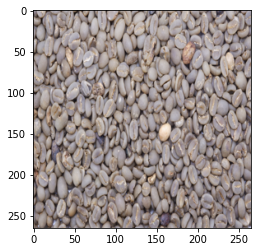

In [ ]:
plt.imshow(image_list[20])

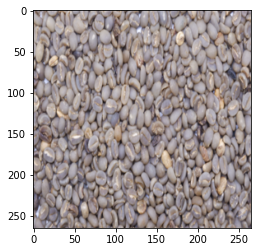

In [ ]:
plt.imshow(image_list[200])

# Color Histogram

<function matplotlib.pyplot.show>

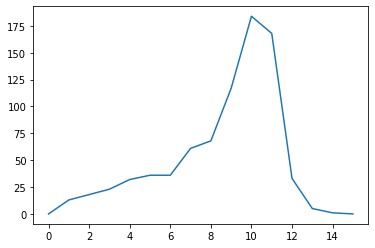

In [ ]:
# coba histogram
histr = cv2.calcHist(arrayImages[20], [0], None, [16], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

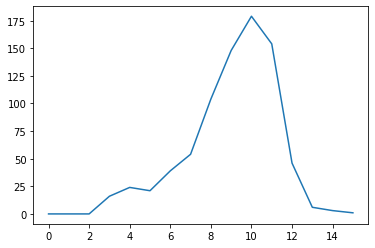

In [ ]:
# coba histogram
histr = cv2.calcHist(arrayImages[200], [1], None, [16], [0,256])
plt.plot(histr)
plt.show

<function matplotlib.pyplot.show>

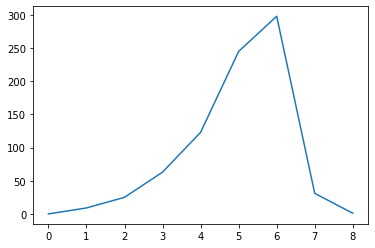

In [ ]:
# coba histogram
histr = cv2.calcHist(arrayImages[400], [2], None, [9], [0,256])
plt.plot(histr)
plt.show

In [ ]:
histr.shape

(9, 1)

In [ ]:
hist, bin_edges = np.histogram(histr, density=True)

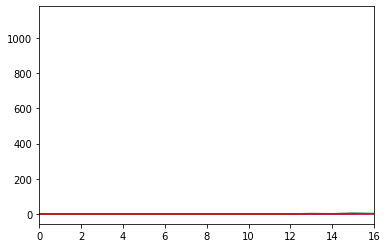

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

color = ('b','g','r')
plt.figure()
for i,col in enumerate(color):
    histr = cv2.calcHist([arrayImages[5]],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,16])
plt.show()

In [ ]:
def getColorHistogram(rgb_image, channel):
  colHist = cv2.calcHist(rgb_image, [channel], None, [256], [0,256])
  (hist, _) = np.histogram(colHist, bins=16)
  return hist, colHist

In [ ]:
def getColorAverage(rgb_image):
  getAverage_row = np.average(rgb_image, axis=0)
  getAverage = np.average(getAverage_row, axis=0)
  return getAverage

In [ ]:
def getRedAverage(red_image):
  redAverage_row = np.average(red_image, axis=0)
  redAverage = np.average(redAverage_row, axis=0)
  return redAverage

In [ ]:
def getMedian(rgb_image):
  median_imagerow = np.median(rgb_image, axis=0)
  median_image = np.median(median_imagerow, axis=0)
  return median_image

In [ ]:
from scipy import stats

def getMode(chist):
  mode_image = stats.mode(chist, axis=0)
  return mode_image

In [ ]:
listColHist = [] #list Color Histogram
listImgHist = [] #list image Color Histogram
redchannel = []
bluechannel = []
greenchannel = []
listAverage = []
redAvgs = []
medians = []
modes = []
for image in arrayImages:
  chist_red, img = getColorHistogram(image, 0)
  chist_green, img = getColorHistogram(image, 1)
  chist_blue, img = getColorHistogram(image, 2)

  average_img = getColorAverage(image)
  #red_avg = getRedAverage((chist_red, 0))

  totalHist = np.concatenate((chist_red, chist_green))
  totalHist = np.concatenate((totalHist, chist_blue))

  #avg_color_per_row = np.average(totalHist, axis=0)
  #avg_color = np.average(avg_color_per_row)

  median = getMedian(image)
  #mode = getMode(totalHist)

  listColHist.append((totalHist))
  listImgHist.append(img)
  redchannel.append(chist_red)
  bluechannel.append(chist_blue)
  greenchannel.append(chist_green)
  listAverage.append(average_img)
  #redAvgs.append(red_avg)
  medians.append(median)
  #modes.append(mode)
  
  
print("Jumlah Citra: ", len(listColHist))

Jumlah Citra:  900


In [ ]:
len(listAverage)
np.array(listAverage).shape

(900, 3)

In [ ]:
averagemode = stats.mode(listAverage[20])
np.array(averagemode).shape

(2, 1)

In [ ]:
modeavg = []
for ma in listAverage:
  modeaverage = stats.mode(ma)
  modeavg.append(ma)

In [ ]:
len(modeavg)

900

In [ ]:
np.array(modeavg).shape

(900, 3)

In [ ]:
listAverage[20]

array([149.3998576 , 137.54635813, 134.4358277 ])

In [ ]:
print(medians)

[array([164., 148., 135.]), array([160., 147., 142.]), array([162., 147., 138.]), array([162., 149., 141.]), array([161., 149., 147.]), array([161., 148., 145.]), array([159., 147., 144.]), array([159., 146., 143.]), array([158., 146., 145.]), array([160., 147., 146.]), array([160., 147., 144.]), array([159., 147., 144.]), array([161., 149., 148.]), array([160., 148., 147.]), array([160., 148., 147.]), array([159., 147., 144.]), array([158., 146., 141.]), array([160., 146., 145.]), array([160., 148., 144.]), array([160., 148., 143.]), array([158., 146., 143.]), array([160., 146., 145.]), array([159., 147., 143.]), array([158., 146., 144.]), array([159., 147., 147.]), array([159., 146., 145.]), array([159., 147., 144.]), array([160., 148., 146.]), array([160., 147., 145.]), array([160., 147., 143.]), array([162., 149., 147.]), array([160., 148., 146.]), array([161., 148., 146.]), array([162., 149., 148.]), array([160., 147., 146.]), array([160., 147., 146.]), array([159., 147., 143.]), 

In [ ]:
np.array(medians).shape

(900, 3)

### Concatenate All Features Extraction Histogram (Rmean, Gmean, Bmean, Medians, Modes)

In [ ]:
FeatureHistogram = np.concatenate((listAverage, medians), axis=1)
FeatureHistogram = np.concatenate((FeatureHistogram, modeavg), axis=1)
print("Citra Feature Histogram: ", len(FeatureHistogram))
np.array(FeatureHistogram).shape

Citra Feature Histogram:  900


(900, 9)

In [ ]:
#FeatureHistogram = np.concatenate((listAverage, modes), axis=1)

In [ ]:
# plt.plot(redAvgs[20])
# plt.show()

In [ ]:
# average_hist = []
# for avgI in listColHist:
#   colorPerHist = listColHist(avgI)
#   abg_color_per_row = np.average(colorPerHist, axis=0)
#   avg_color = np.average(avg_color_per_row, axis=0)
#   print(avg_color)
  
#   average_hist.append(avg_color)

# print("Citra yang sudah di kalkulasikan: ", len(average_hist))

In [ ]:
len(listColHist)

900

In [ ]:
avgListHist = np.average(listColHist, axis=0)
print(avgListHist)
len(avgListHist)

[122.          26.64777778  20.04777778  15.42222222  13.86666667
  11.72111111   9.94555556   7.10555556   8.53777778   5.89222222
   4.69333333   3.19111111   2.53         1.57777778   1.10111111
   1.72       122.08555556  26.33888889  20.00222222  15.63222222
  13.79777778  11.46111111  10.07333333   7.33333333   8.54555556
   5.93         4.63555556   3.23333333   2.56333333   1.61888889
   1.02222222   1.72666667 120.7         26.35777778  20.23777778
  15.62222222  13.84444444  11.71666667  10.24222222   7.26444444
   8.71555556   5.91555556   4.75888889   3.36111111   2.64777778
   1.68222222   1.18111111   1.75222222]


48

[149.3998576  137.54635813 134.4358277 ]


<function matplotlib.pyplot.show>

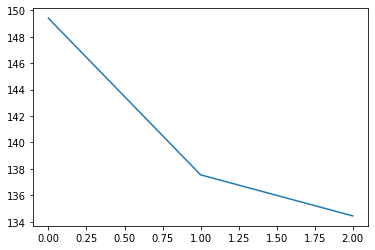

In [ ]:
 avg_color_per_row = np.average(arrayImages[20], axis=0)
 avg_color = np.average(avg_color_per_row, axis=0)
 print(avg_color)
 plt.plot(avg_color)
 plt.show

##### Try Finding Modus



In [ ]:
from scipy import stats
modusImg = stats.mode(listColHist, axis=0)
len(modusImg)
np.array(modusImg).shape

(2, 1, 48)

##### Try Finding Median

In [ ]:
medhist = np.median(arrayImages[20], axis=0)
len(medhist)
print(medhist)

[[153. 138. 136.]
 [149. 134. 131.]
 [146. 128. 125.]
 [144. 127. 123.]
 [147. 131. 124.]
 [149. 135. 132.]
 [155. 145. 142.]
 [160. 151. 148.]
 [157. 148. 143.]
 [164. 152. 149.]
 [166. 154. 152.]
 [167. 155. 152.]
 [163. 154. 149.]
 [155. 143. 140.]
 [146. 132. 128.]
 [140. 128. 127.]
 [151. 138. 136.]
 [159. 144. 142.]
 [159. 148. 143.]
 [156. 144. 139.]
 [153. 138. 132.]
 [156. 145. 139.]
 [158. 148. 143.]
 [155. 143. 137.]
 [149. 138. 134.]
 [147. 135. 130.]
 [145. 133. 130.]
 [148. 137. 134.]
 [151. 140. 137.]
 [154. 142. 142.]
 [159. 146. 147.]
 [165. 154. 147.]
 [162. 149. 144.]
 [158. 146. 143.]
 [154. 143. 139.]
 [156. 143. 138.]
 [159. 148. 145.]
 [161. 148. 143.]
 [157. 142. 139.]
 [150. 138. 132.]
 [151. 136. 130.]
 [157. 143. 135.]
 [158. 147. 143.]
 [164. 151. 149.]
 [167. 157. 152.]
 [167. 155. 151.]
 [166. 155. 149.]
 [162. 150. 142.]
 [156. 141. 139.]
 [152. 141. 140.]
 [155. 146. 148.]
 [158. 147. 146.]
 [165. 153. 152.]
 [168. 159. 158.]
 [170. 161. 160.]
 [167. 157

Mean / Average warna per channel semua gambar dalam list

[122.          26.64777778  20.04777778  15.42222222  13.86666667
  11.72111111   9.94555556   7.10555556   8.53777778   5.89222222
   4.69333333   3.19111111   2.53         1.57777778   1.10111111
   1.72      ]


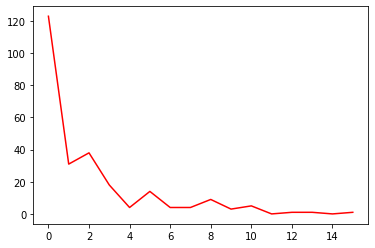

In [ ]:
plt.plot(redchannel[20], "r")
plt.show
avg_red = np.average(redchannel, axis=0)
print(avg_red)

array([120.7       ,  26.35777778,  20.23777778,  15.62222222,
        13.84444444,  11.71666667,  10.24222222,   7.26444444,
         8.71555556,   5.91555556,   4.75888889,   3.36111111,
         2.64777778,   1.68222222,   1.18111111,   1.75222222])

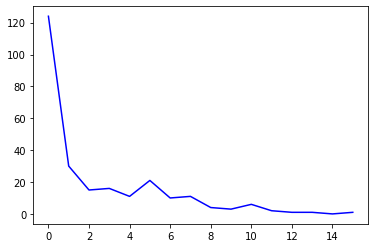

In [ ]:
plt.plot(bluechannel[20], "blue")
plt.show
avg_blue = np.average(bluechannel, axis=0)
avg_blue

array([122.08555556,  26.33888889,  20.00222222,  15.63222222,
        13.79777778,  11.46111111,  10.07333333,   7.33333333,
         8.54555556,   5.93      ,   4.63555556,   3.23333333,
         2.56333333,   1.61888889,   1.02222222,   1.72666667])

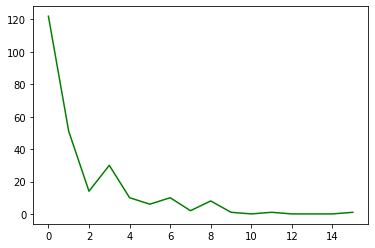

In [ ]:
plt.plot(greenchannel[20], "green")
plt.show
avg_green = np.average(greenchannel, axis=0)
avg_green

In [ ]:
256 * 3

768

In [ ]:
np.array(listColHist).shape

(900, 48)

# LBP Using Library

In [ ]:
from skimage.feature import local_binary_pattern
def getLBPimageScikit(gray_image):
  p = 8
  r = 1
  grayscalling = cv2.cvtColor(gray_image, cv2.COLOR_BGR2GRAY)
  lbp = local_binary_pattern(grayscalling, p, r, method = 'default')
  n_bins = int(lbp.max() + 1)
  (hist, _) = np.histogram(lbp, bins=n_bins, range=(0, n_bins), density = True)
  return hist, lbp

In [ ]:
listHistLBP = []
listImgLBP = []
for image in arrayImages:
    hist, img = getLBPimageScikit(image)
    listHistLBP.append((hist))
    listImgLBP.append(img)
print("Jumlah Citra: ", len(listHistLBP))

Jumlah Citra:  900


In [ ]:
np.array(listHistLBP).shape

(900, 256)

(array([208.,  21.,  11.,   2.,   6.,   1.,   2.,   0.,   4.,   1.]),
 array([0.        , 0.00579708, 0.01159416, 0.01739124, 0.02318832,
        0.0289854 , 0.03478248, 0.04057957, 0.04637665, 0.05217373,
        0.05797081]),
 <a list of 10 Patch objects>)

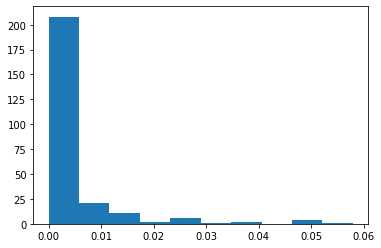

In [ ]:
plt.hist(listHistLBP[20])

(array([214.,  14.,  11.,   3.,   6.,   3.,   1.,   0.,   1.,   3.]),
 array([0.        , 0.00598362, 0.01196725, 0.01795087, 0.0239345 ,
        0.02991812, 0.03590174, 0.04188537, 0.04786899, 0.05385262,
        0.05983624]),
 <a list of 10 Patch objects>)

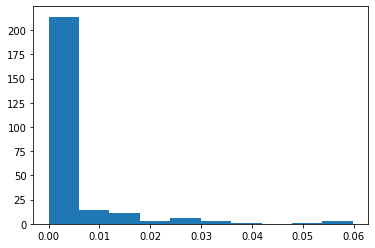

In [ ]:
plt.hist(listHistLBP[189])

In [ ]:
np.array(listColHist).shape

(900, 48)

In [ ]:
np.array(listHistLBP).shape

(900, 256)

In [ ]:
np.array(listAverage).shape

(900, 3)

In [ ]:
#listFeature = np.concatenate((listHistLBP, listColHist), axis=1)
#listFeature = np.concatenate((listHistLBP, listAverage), axis=1)
allFeature = np.concatenate((listHistLBP, FeatureHistogram), axis=1)

In [ ]:
allFeature.shape

(900, 265)

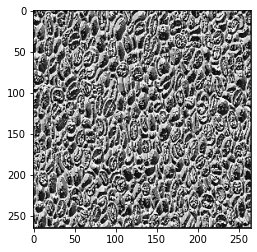

In [ ]:
plt.imshow(listImgLBP[20], cmap="gray")

# Random Forrest Classifier

In [ ]:
# coba satuin list histogram LBP sama Histogram Color
# imagesHist = listColHist, listHistLBP

### LBP Parameter





In [ ]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


#### Training LBP Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)


#print("Akurasi", accuracy_score(y_test, y_pred))
#coba data train
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.8076285240464345


#### Testing LBP Random Forrest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)


#print("Akurasi", accuracy_score(y_test, y_pred))
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.8080808080808081


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[46  7  3  0  0]
 [ 5 40 16  1  0]
 [ 3  8 56  5  0]
 [ 0  1  0 50  1]
 [ 0  0  0  7 48]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        56
           1       0.71      0.65      0.68        62
           2       0.75      0.78      0.76        72
           3       0.79      0.96      0.87        52
           4       0.98      0.87      0.92        55

    accuracy                           0.81       297
   macro avg       0.82      0.82      0.81       297
weighted avg       0.81      0.81      0.81       297



### Try Only using Histogram Parameter

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


#### Training Histogram using Random Forrest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.746268656716418


### Testing Histogram using Random Forrest

In [ ]:
  from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.7474747474747475


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[45  4  5  0  2]
 [13 34 10  5  0]
 [ 5 21 43  3  0]
 [ 0  0  3 47  2]
 [ 0  0  0  2 53]]
              precision    recall  f1-score   support

           0       0.71      0.80      0.76        56
           1       0.58      0.55      0.56        62
           2       0.70      0.60      0.65        72
           3       0.82      0.90      0.86        52
           4       0.93      0.96      0.95        55

    accuracy                           0.75       297
   macro avg       0.75      0.76      0.75       297
weighted avg       0.74      0.75      0.74       297



#### Training Concatenate Histogram + LBP using Random Forrest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_train)
print("Akurasi", accuracy_score(y_train, y_pred))

Akurasi 0.835820895522388


#### Testing concatenate Histogram + LBP using Random Forrest

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Akurasi", accuracy_score(y_test, y_pred))

Akurasi 0.8720538720538721


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

[[55  0  1  0  0]
 [ 7 41 14  0  0]
 [ 0 10 60  2  0]
 [ 0  0  0 52  0]
 [ 0  0  0  4 51]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        56
           1       0.80      0.66      0.73        62
           2       0.80      0.83      0.82        72
           3       0.90      1.00      0.95        52
           4       1.00      0.93      0.96        55

    accuracy                           0.87       297
   macro avg       0.88      0.88      0.88       297
weighted avg       0.87      0.87      0.87       297



# KNN Classifier

In [ ]:
from sklearn.model_selection import train_test_split

### Training LBP using KNN

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)
#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.9203980099502488


Testing LBP using KNN

In [ ]:
# from sklearn.model_selection import train_test_split
# #X_train, X_test, y_train, y_test = train_test_split(listFeature, label, test_size=0.33, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
# print("Jumlah data train: ", len(X_train))
# print("Jumlah data test: ", len(X_test))

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# neigh = KNeighborsClassifier(n_neighbors=5)
y_pred = neigh.predict(X_test)
print("Akurasi KNN = ", accuracy_score(y_test, y_pred))

Akurasi KNN =  0.8518518518518519


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  7  5  0  0]
 [ 6 50  5  1  0]
 [ 0  9 61  2  0]
 [ 0  1  2 49  0]
 [ 0  0  0  6 49]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        56
           1       0.75      0.81      0.78        62
           2       0.84      0.85      0.84        72
           3       0.84      0.94      0.89        52
           4       1.00      0.89      0.94        55

    accuracy                           0.85       297
   macro avg       0.86      0.85      0.86       297
weighted avg       0.86      0.85      0.85       297



### Color histogram using KNN

#### Training Color Histogram using KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)


#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.8441127694859039


#### Testing Color Histogram using KNN 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_test, y_test)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_test,y_test))

Akurasi KNN = 0.8215488215488216


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  7  5  0  0]
 [ 6 50  5  1  0]
 [ 0  9 61  2  0]
 [ 0  1  2 49  0]
 [ 0  0  0  6 49]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        56
           1       0.75      0.81      0.78        62
           2       0.84      0.85      0.84        72
           3       0.84      0.94      0.89        52
           4       1.00      0.89      0.94        55

    accuracy                           0.85       297
   macro avg       0.86      0.85      0.86       297
weighted avg       0.86      0.85      0.85       297



#### Training Concate using KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_train,y_train))

Akurasi KNN = 0.8441127694859039


#### Testing Concate using KNN

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(allFeature, label, test_size=0.33, random_state=42)
print("Jumlah data train: ", len(X_train))
print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_test, y_test)

#print("Akurasi KNN =", neigh.score(X_test,y_test))
print("Akurasi KNN =", neigh.score(X_test,y_test))

Akurasi KNN = 0.8215488215488216


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44  7  5  0  0]
 [ 6 50  5  1  0]
 [ 0  9 61  2  0]
 [ 0  1  2 49  0]
 [ 0  0  0  6 49]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        56
           1       0.75      0.81      0.78        62
           2       0.84      0.85      0.84        72
           3       0.84      0.94      0.89        52
           4       1.00      0.89      0.94        55

    accuracy                           0.85       297
   macro avg       0.86      0.85      0.86       297
weighted avg       0.86      0.85      0.85       297



# SVM Classifier

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(listHistLBP, label, test_size=0.33, random_state=42)
# print("Jumlah data train: ", len(X_train))
# print("Jumlah data test: ", len(X_test))

Jumlah data train:  603
Jumlah data test:  297


In [ ]:
# from sklearn import svm
# clf = svm.SVC(gamma="auto")
# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

In [ ]:
# from sklearn import metrics
# print("Accuracy SVM: ", metrics.accuracy_score(y_test, y_pred))

Accuracy SVM:  0.1750841750841751


# ANN Classifier

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.utils import to_categorical, plot_model

In [ ]:
input_shape = (256, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              526336    
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2

In [ ]:
#label[label == 3] = 0

label

# 0 1 2

0      0
1      0
2      0
3      0
4      0
      ..
895    4
896    4
897    4
898    4
899    4
Name: label, Length: 900, dtype: int64

In [ ]:
y = to_categorical(label, num_classes=5)

In [ ]:
print(y)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [ ]:
listHistLBP_new = np.array(listHistLBP)
listHistLBP_new.shape

# 1 2 3 => dibaca 4 kelas karna mulai 0
# 0 1 2

(900, 256)

In [ ]:
FeatureHistogram_new = np.array(FeatureHistogram)
FeatureHistogram_new.shape

(900, 9)

## ANN with LBP feature

---



### Training LBP using ANN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 73ms/step - loss: 1.6101 - accuracy: 0.1852 - val_loss: 1.6150 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 1s 52ms/step - loss: 1.6021 - accuracy: 0.2391 - val_loss: 1.6240 - val_accuracy: 0.1791
Epoch 3/1000
10/10 [==============================] - 1s 50ms/step - loss: 1.6154 - accuracy: 0.2088 - val_loss: 1.6223 - val_accuracy: 0.1791
Epoch 4/1000
10/10 [==============================] - 1s 52ms/step - loss: 1.6042 - accuracy: 0.2256 - val_loss: 1.6191 - val_accuracy: 0.1791
Epoch 5/1000
10/10 [==============================] - 1s 54ms/step - loss: 1.6021 - accuracy: 0.2492 - val_loss: 1.6134 - val_accuracy: 0.1791
Epoch 6/1000
10/10 [==============================] - 1s 51ms/step - loss: 1.5970 - accuracy: 0.2391 - val_loss: 1.6060 - val_accuracy: 0.1791
Epoch 7/1000
10/10 [==============================] - 1s 52ms/step - loss: 1.5916 - accuracy: 0.2626 - val_loss: 1.6023 - val_accuracy: 0.1791

#### Testing LBP using ANN

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listHistLBP_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000


ValueError: ignored

## ANN with Color Histogram

In [ ]:
input_shape = (9, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2048)              20480     
_________________________________________________________________
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_7 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 1s 41ms/step - loss: 25.8508 - accuracy: 0.2090 - val_loss: 9.0259 - val_accuracy: 0.1886
Epoch 2/1000
19/19 [==============================] - 1s 34ms/step - loss: 10.4025 - accuracy: 0.2255 - val_loss: 2.5500 - val_accuracy: 0.1886
Epoch 3/1000
19/19 [==============================] - 1s 33ms/step - loss: 4.2817 - accuracy: 0.1675 - val_loss: 1.6154 - val_accuracy: 0.1886
Epoch 4/1000
19/19 [==============================] - 1s 34ms/step - loss: 2.4601 - accuracy: 0.1725 - val_loss: 1.6250 - val_accuracy: 0.1886
Epoch 5/1000
19/19 [==============================] - 1s 34ms/step - loss: 2.0559 - accuracy: 0.2123 - val_loss: 1.6159 - val_accuracy: 0.1751
Epoch 6/1000
19/19 [==============================] - 1s 34ms/step - loss: 1.9049 - accuracy: 0.1940 - val_loss: 1.6146 - val_accuracy: 0.2088
Epoch 7/1000
19/19 [==============================] - 1s 34ms/step - loss: 1.8601 - accuracy: 0.1924 - val_loss: 1.6129 - val_accuracy: 0.24

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(FeatureHistogram_new, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 0s 49ms/step - loss: 1.6181 - accuracy: 0.1751 - val_loss: 1.6077 - val_accuracy: 0.2123
Epoch 2/1000
10/10 [==============================] - 0s 39ms/step - loss: 1.6175 - accuracy: 0.1751 - val_loss: 1.6077 - val_accuracy: 0.2123
Epoch 3/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6164 - accuracy: 0.1751 - val_loss: 1.6078 - val_accuracy: 0.2123
Epoch 4/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6161 - accuracy: 0.1751 - val_loss: 1.6078 - val_accuracy: 0.2123
Epoch 5/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6152 - accuracy: 0.1751 - val_loss: 1.6079 - val_accuracy: 0.2123
Epoch 6/1000
10/10 [==============================] - 0s 39ms/step - loss: 1.6145 - accuracy: 0.1751 - val_loss: 1.6080 - val_accuracy: 0.2123
Epoch 7/1000
10/10 [==============================] - 0s 40ms/step - loss: 1.6142 - accuracy: 0.1751 - val_loss: 1.6081 - val_accuracy: 0.2123

ANN For Concate Methods

In [ ]:
input_shape = (265, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 2048)              544768    
_________________________________________________________________
dropout_9 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(allFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 54ms/step - loss: 32.6262 - accuracy: 0.1785 - val_loss: 22.2967 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 0s 44ms/step - loss: 25.5505 - accuracy: 0.1414 - val_loss: 9.5262 - val_accuracy: 0.1791
Epoch 3/1000
10/10 [==============================] - 0s 44ms/step - loss: 12.9111 - accuracy: 0.2189 - val_loss: 2.2582 - val_accuracy: 0.2073
Epoch 4/1000
10/10 [==============================] - 0s 45ms/step - loss: 7.3901 - accuracy: 0.2121 - val_loss: 2.4565 - val_accuracy: 0.2056
Epoch 5/1000
10/10 [==============================] - 0s 43ms/step - loss: 4.7610 - accuracy: 0.2054 - val_loss: 1.7870 - val_accuracy: 0.1957
Epoch 6/1000
10/10 [==============================] - 0s 44ms/step - loss: 3.3897 - accuracy: 0.2020 - val_loss: 1.6562 - val_accuracy: 0.1791
Epoch 7/1000
10/10 [==============================] - 0s 43ms/step - loss: 2.8678 - accuracy: 0.1886 - val_loss: 1.6158 - val_accuracy: 0.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(allFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 57ms/step - loss: 1.6039 - accuracy: 0.2424 - val_loss: 1.6233 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 0s 45ms/step - loss: 1.6031 - accuracy: 0.2424 - val_loss: 1.6234 - val_accuracy: 0.1791
Epoch 3/1000
10/10 [==============================] - 0s 45ms/step - loss: 1.6022 - accuracy: 0.2424 - val_loss: 1.6230 - val_accuracy: 0.1791
Epoch 4/1000
10/10 [==============================] - 0s 46ms/step - loss: 1.6029 - accuracy: 0.2424 - val_loss: 1.6227 - val_accuracy: 0.1791
Epoch 5/1000
10/10 [==============================] - 0s 46ms/step - loss: 1.6029 - accuracy: 0.2424 - val_loss: 1.6226 - val_accuracy: 0.1791
Epoch 6/1000
10/10 [==============================] - 0s 46ms/step - loss: 1.6035 - accuracy: 0.2424 - val_loss: 1.6225 - val_accuracy: 0.1791
Epoch 7/1000
10/10 [==============================] - 0s 45ms/step - loss: 1.6023 - accuracy: 0.2424 - val_loss: 1.6226 - val_accuracy: 0.1791

In [ ]:
input_shape = (259, )
num_classes = 5

model = Sequential([
  Dense(units=2048 , activation='relu', input_shape=input_shape),
  Dropout(0.5),
  Dense(units=1024, activation='relu'),
  Dropout(0.5),
  Dense(units=512, activation='relu'),
  Dropout(0.5),
  Dense(units=num_classes, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 2048)              532480    
_________________________________________________________________
dropout_21 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_22 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 5)                

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_test, y_test, batch_size=32, epochs=1000, validation_data=(X_train, y_train))

Epoch 1/1000
10/10 [==============================] - 1s 58ms/step - loss: 20.2391 - accuracy: 0.2054 - val_loss: 5.0997 - val_accuracy: 0.1791
Epoch 2/1000
10/10 [==============================] - 0s 48ms/step - loss: 10.0816 - accuracy: 0.1919 - val_loss: 4.7441 - val_accuracy: 0.2123
Epoch 3/1000
10/10 [==============================] - 0s 46ms/step - loss: 7.2070 - accuracy: 0.1684 - val_loss: 1.8285 - val_accuracy: 0.2123
Epoch 4/1000
10/10 [==============================] - 0s 45ms/step - loss: 3.9637 - accuracy: 0.1953 - val_loss: 1.7952 - val_accuracy: 0.1957
Epoch 5/1000
10/10 [==============================] - 0s 46ms/step - loss: 2.9890 - accuracy: 0.1684 - val_loss: 1.6533 - val_accuracy: 0.1957
Epoch 6/1000
10/10 [==============================] - 0s 45ms/step - loss: 2.6051 - accuracy: 0.1953 - val_loss: 1.6392 - val_accuracy: 0.1957
Epoch 7/1000
10/10 [==============================] - 0s 45ms/step - loss: 2.2720 - accuracy: 0.2121 - val_loss: 1.6291 - val_accuracy: 0.17

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(listFeature, y, test_size=0.33, shuffle=True, random_state=42)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=1000, validation_data=(X_test, y_test))

Epoch 1/1000
19/19 [==============================] - 1s 43ms/step - loss: 1.6228 - accuracy: 0.1791 - val_loss: 1.6026 - val_accuracy: 0.2424
Epoch 2/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6207 - accuracy: 0.1791 - val_loss: 1.6028 - val_accuracy: 0.2424
Epoch 3/1000
19/19 [==============================] - 1s 36ms/step - loss: 1.6185 - accuracy: 0.1791 - val_loss: 1.6031 - val_accuracy: 0.2424
Epoch 4/1000
19/19 [==============================] - 1s 38ms/step - loss: 1.6174 - accuracy: 0.1791 - val_loss: 1.6035 - val_accuracy: 0.2424
Epoch 5/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6156 - accuracy: 0.1791 - val_loss: 1.6040 - val_accuracy: 0.2424
Epoch 6/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6151 - accuracy: 0.1791 - val_loss: 1.6047 - val_accuracy: 0.2424
Epoch 7/1000
19/19 [==============================] - 1s 37ms/step - loss: 1.6140 - accuracy: 0.1758 - val_loss: 1.6054 - val_accuracy: 0.2424